# Q1-NN normalize


### Dependencies 


This quantum algorithm uses qiskit, numpy, skelearn  and seaborn as dependencies to run the cide.

In [1]:
# import sklearn to load the iris dataset and split the dataset in train and test model, and the metric confusion matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import pandas to use seaborn plots as hue parameter
import pandas as pd

# import seaborn to plot the iris dataset
import seaborn as sns

# import numpy for postprocessing to find the k-nn label
import numpy as np

# import qiskit minimal methods to use quantum circuit and use qubits as the classical bits
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister,transpile
from qiskit.circuit.library.standard_gates import RYGate,RZGate

import sys
import os
cwd = os.getcwd()
sep = os.path.sep
dir = sep.join(cwd.split(sep)[:-2])
sys.path.append(dir) 

from qknn.functions import index_positions, diffuser, qram, oracle_st, qknn, qknn_experiments

# Dataset

Obtained  iris dataset from sklearn using dataset module. The iris dataset is used, which has 3 classes: **Iris-setosa**,**Iris-versicolor**,**Iris-virginica**, each with 50 instances, resulting in a total of 150.


In [2]:
iris = datasets.load_iris()

This dataset plot using Seaborn module, a dataframe is required to read the variables, denoted as 'var1', 'var2', 'var3', and 'var4', along with the 'class' for color differentiation. Additionally, the chosen color palette is 'Paired'. 

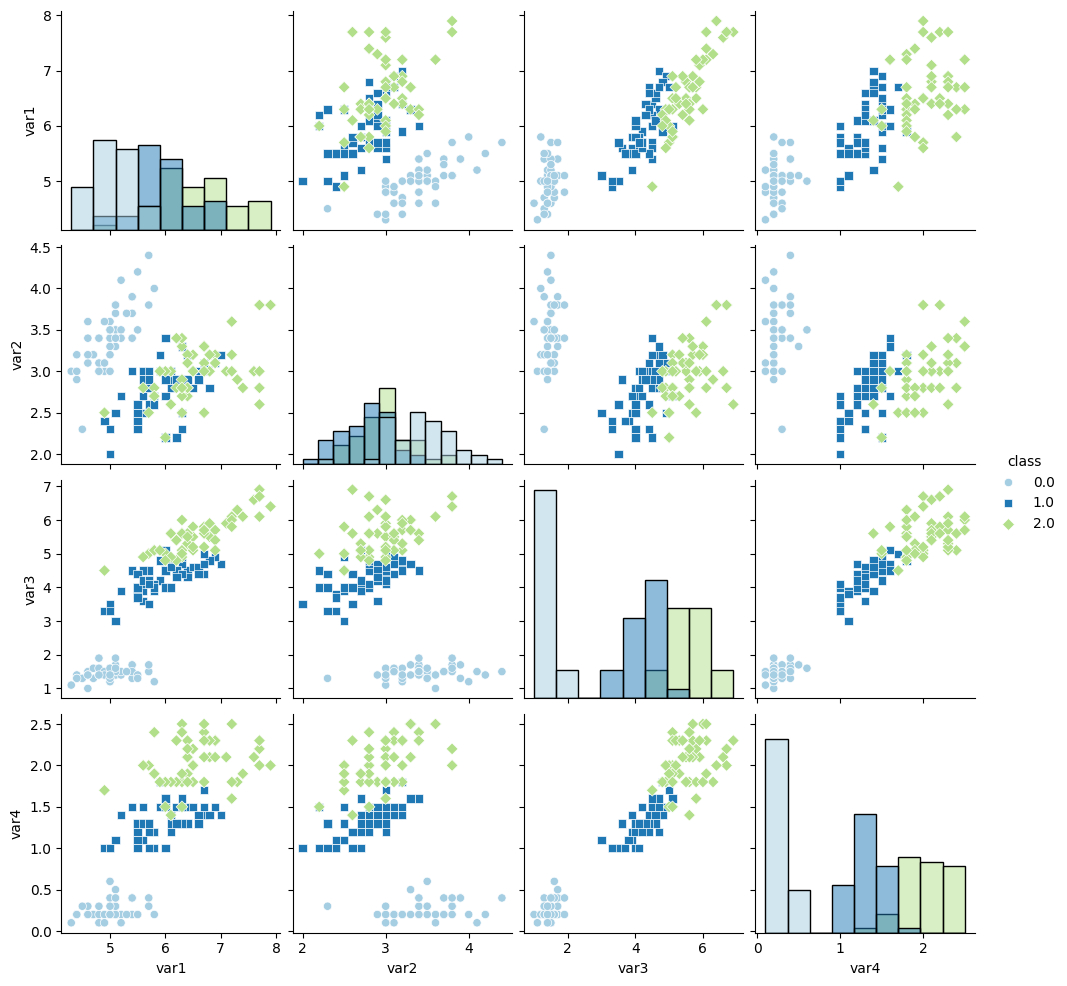

In [3]:
df_iris = pd.DataFrame(np.append(iris['data'],np.atleast_2d(iris['target']).T, axis=1))
df_iris.columns =['var1', 'var2', 'var3', 'var4',"class"]
sns.pairplot(df_iris,hue="class", diag_kind="hist", markers=["o", "s", "D"], palette="Paired")

In [4]:
iris['data'].T[3]

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

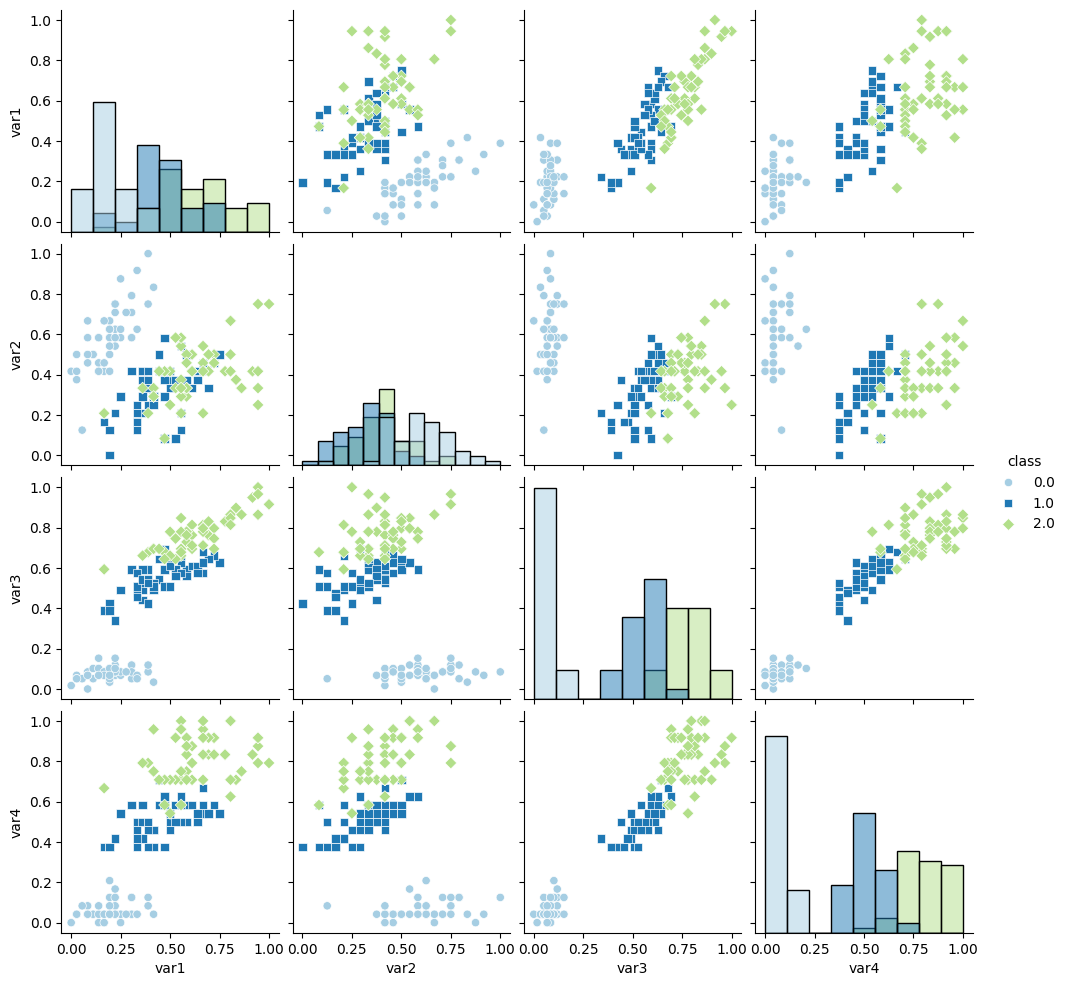

In [5]:
features = len(iris['data'][0])

for i in range(4):
    iris['data'].T[i] = (iris['data'].T[i]- min(iris['data'].T[i]))/(max(iris['data'].T[i])-min(iris['data'].T[i]))

df_iris = pd.DataFrame(np.append(iris['data'],np.atleast_2d(iris['target']).T, axis=1))
df_iris.columns =['var1', 'var2', 'var3', 'var4',"class"]
sns.pairplot(df_iris,hue="class", diag_kind="hist", markers=["o", "s", "D"], palette="Paired")

The hold-out method is used, with a split of 70% for the training set and 30% for the test set.

In [6]:
x_train, x_test, y_train, y_test =train_test_split(iris['data'], iris['target'], train_size=0.7, test_size=0.3, random_state=18)

In [7]:
print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

Number of original training examples: 105
Number of original test examples: 45


### Experiments

Experiments of the QK-NN with size of QRAM of 8, 16, 32, 64, and 128 cells of memory.

###  Results

#### RY

([97.77777777777777, 97.77777777777777, 95.55555555555556, 93.33333333333333, 95.55555555555556, 95.55555555555556, 93.33333333333333, 95.55555555555556, 95.55555555555556, 97.77777777777777], [97.77777777777777, 95.55555555555556, 95.55555555555556, 97.77777777777777, 97.77777777777777, 97.77777777777777, 97.77777777777777, 97.77777777777777, 95.55555555555556, 97.77777777777777], [97.77777777777777, 95.55555555555556, 97.77777777777777, 95.55555555555556, 97.77777777777777, 91.11111111111111, 95.55555555555556, 95.55555555555556, 100.0, 97.77777777777777], [95.55555555555556, 91.11111111111111, 100.0, 95.55555555555556, 93.33333333333333, 93.33333333333333, 93.33333333333333, 95.55555555555556, 95.55555555555556, 97.77777777777777], [])
The MAE value of each size is 
MAE of  QRAM of size 8 cells of memory with 95.78 +/- 1.20.
MAE of  QRAM of size 16 cells of memory with 97.11 +/- 0.93.
MAE of  QRAM of size 32 cells of memory with 96.44 +/- 1.78.
MAE of  QRAM of size 64 cells of memor

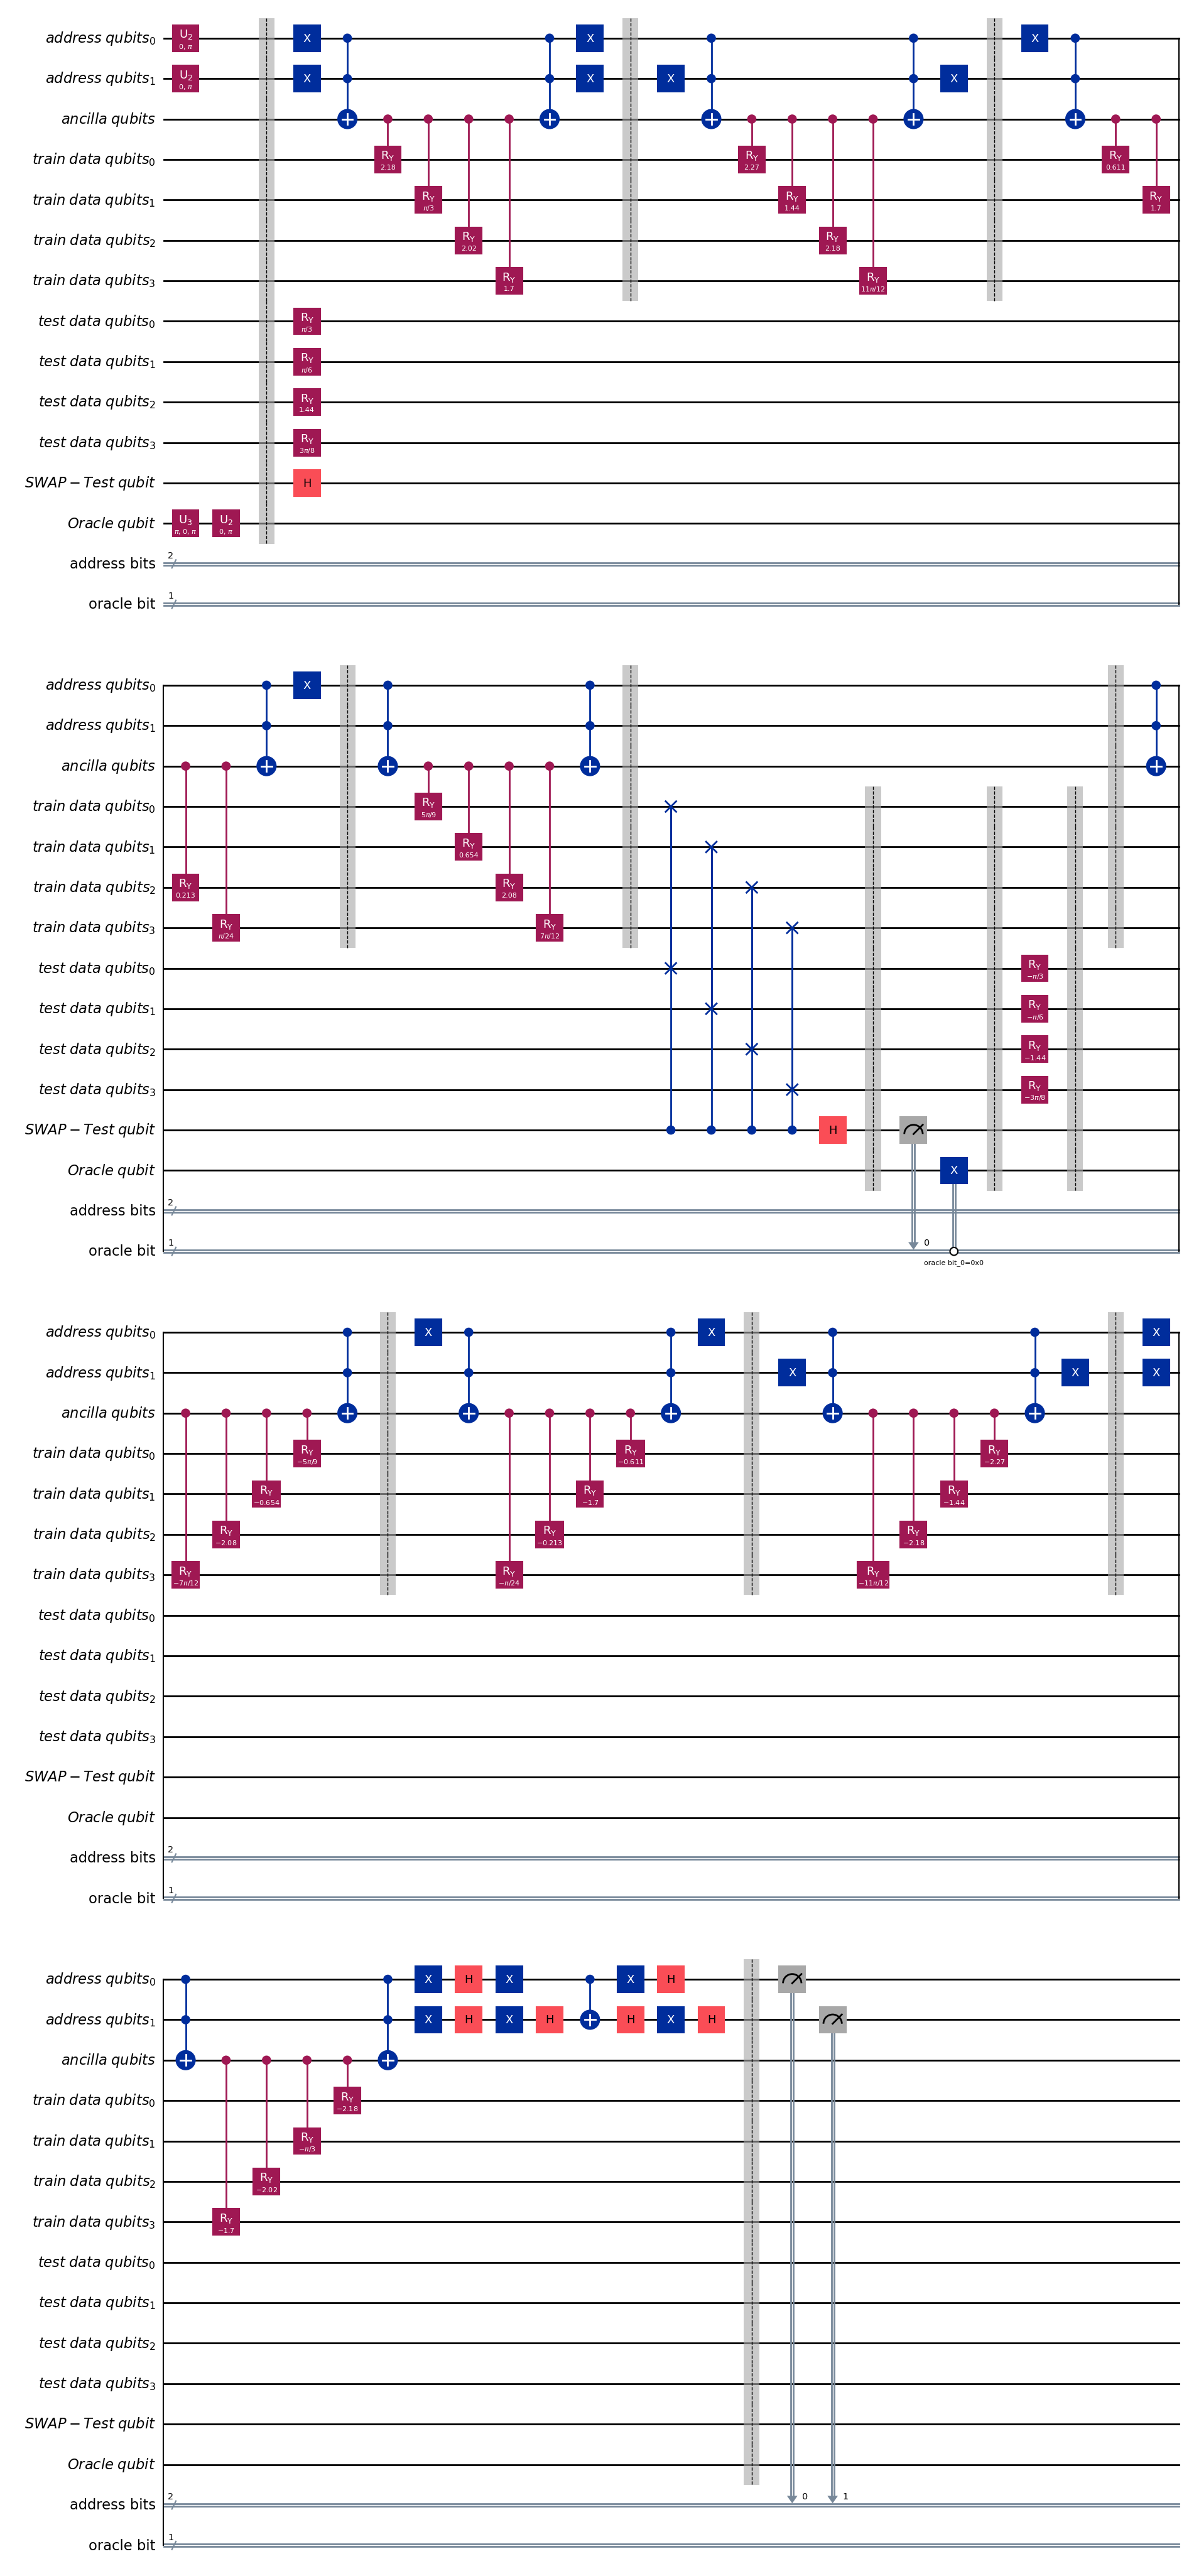

In [16]:
experiment_size = 10
min_QRAM = 3
max_QRAM = 7
qknn_e = qknn_experiments(
    x_test=x_test*np.pi,
    x_train=x_train*np.pi,
    y_test=y_test,
    y_train=y_train,
    features=4,
    min_QRAM=min_QRAM,
    max_QRAM=max_QRAM,
    max_trials=1,
    rotation="ry",
    experiment_size=experiment_size)

print(qknn_e.experiments_knn(k=1))
qknn_e.print_results()
qknn_e.draw_qknn(0).decompose().draw("mpl")

#### RZ

([97.77777777777777, 95.55555555555556, 95.55555555555556, 95.55555555555556, 93.33333333333333, 97.77777777777777, 97.77777777777777, 93.33333333333333, 95.55555555555556, 97.77777777777777], [93.33333333333333, 95.55555555555556, 97.77777777777777, 97.77777777777777, 97.77777777777777, 97.77777777777777, 97.77777777777777, 95.55555555555556, 97.77777777777777, 95.55555555555556], [100.0, 95.55555555555556, 95.55555555555556, 97.77777777777777, 97.77777777777777, 97.77777777777777, 97.77777777777777, 97.77777777777777, 95.55555555555556, 95.55555555555556], [95.55555555555556, 93.33333333333333, 91.11111111111111, 95.55555555555556, 93.33333333333333, 97.77777777777777, 91.11111111111111, 95.55555555555556, 93.33333333333333, 95.55555555555556], [])
The MAE value of each size is 
MAE of  QRAM of size 8 cells of memory with 96.00 +/- 1.42.
MAE of  QRAM of size 16 cells of memory with 96.67 +/- 1.33.
MAE of  QRAM of size 32 cells of memory with 97.11 +/- 1.24.
MAE of  QRAM of size 64 ce

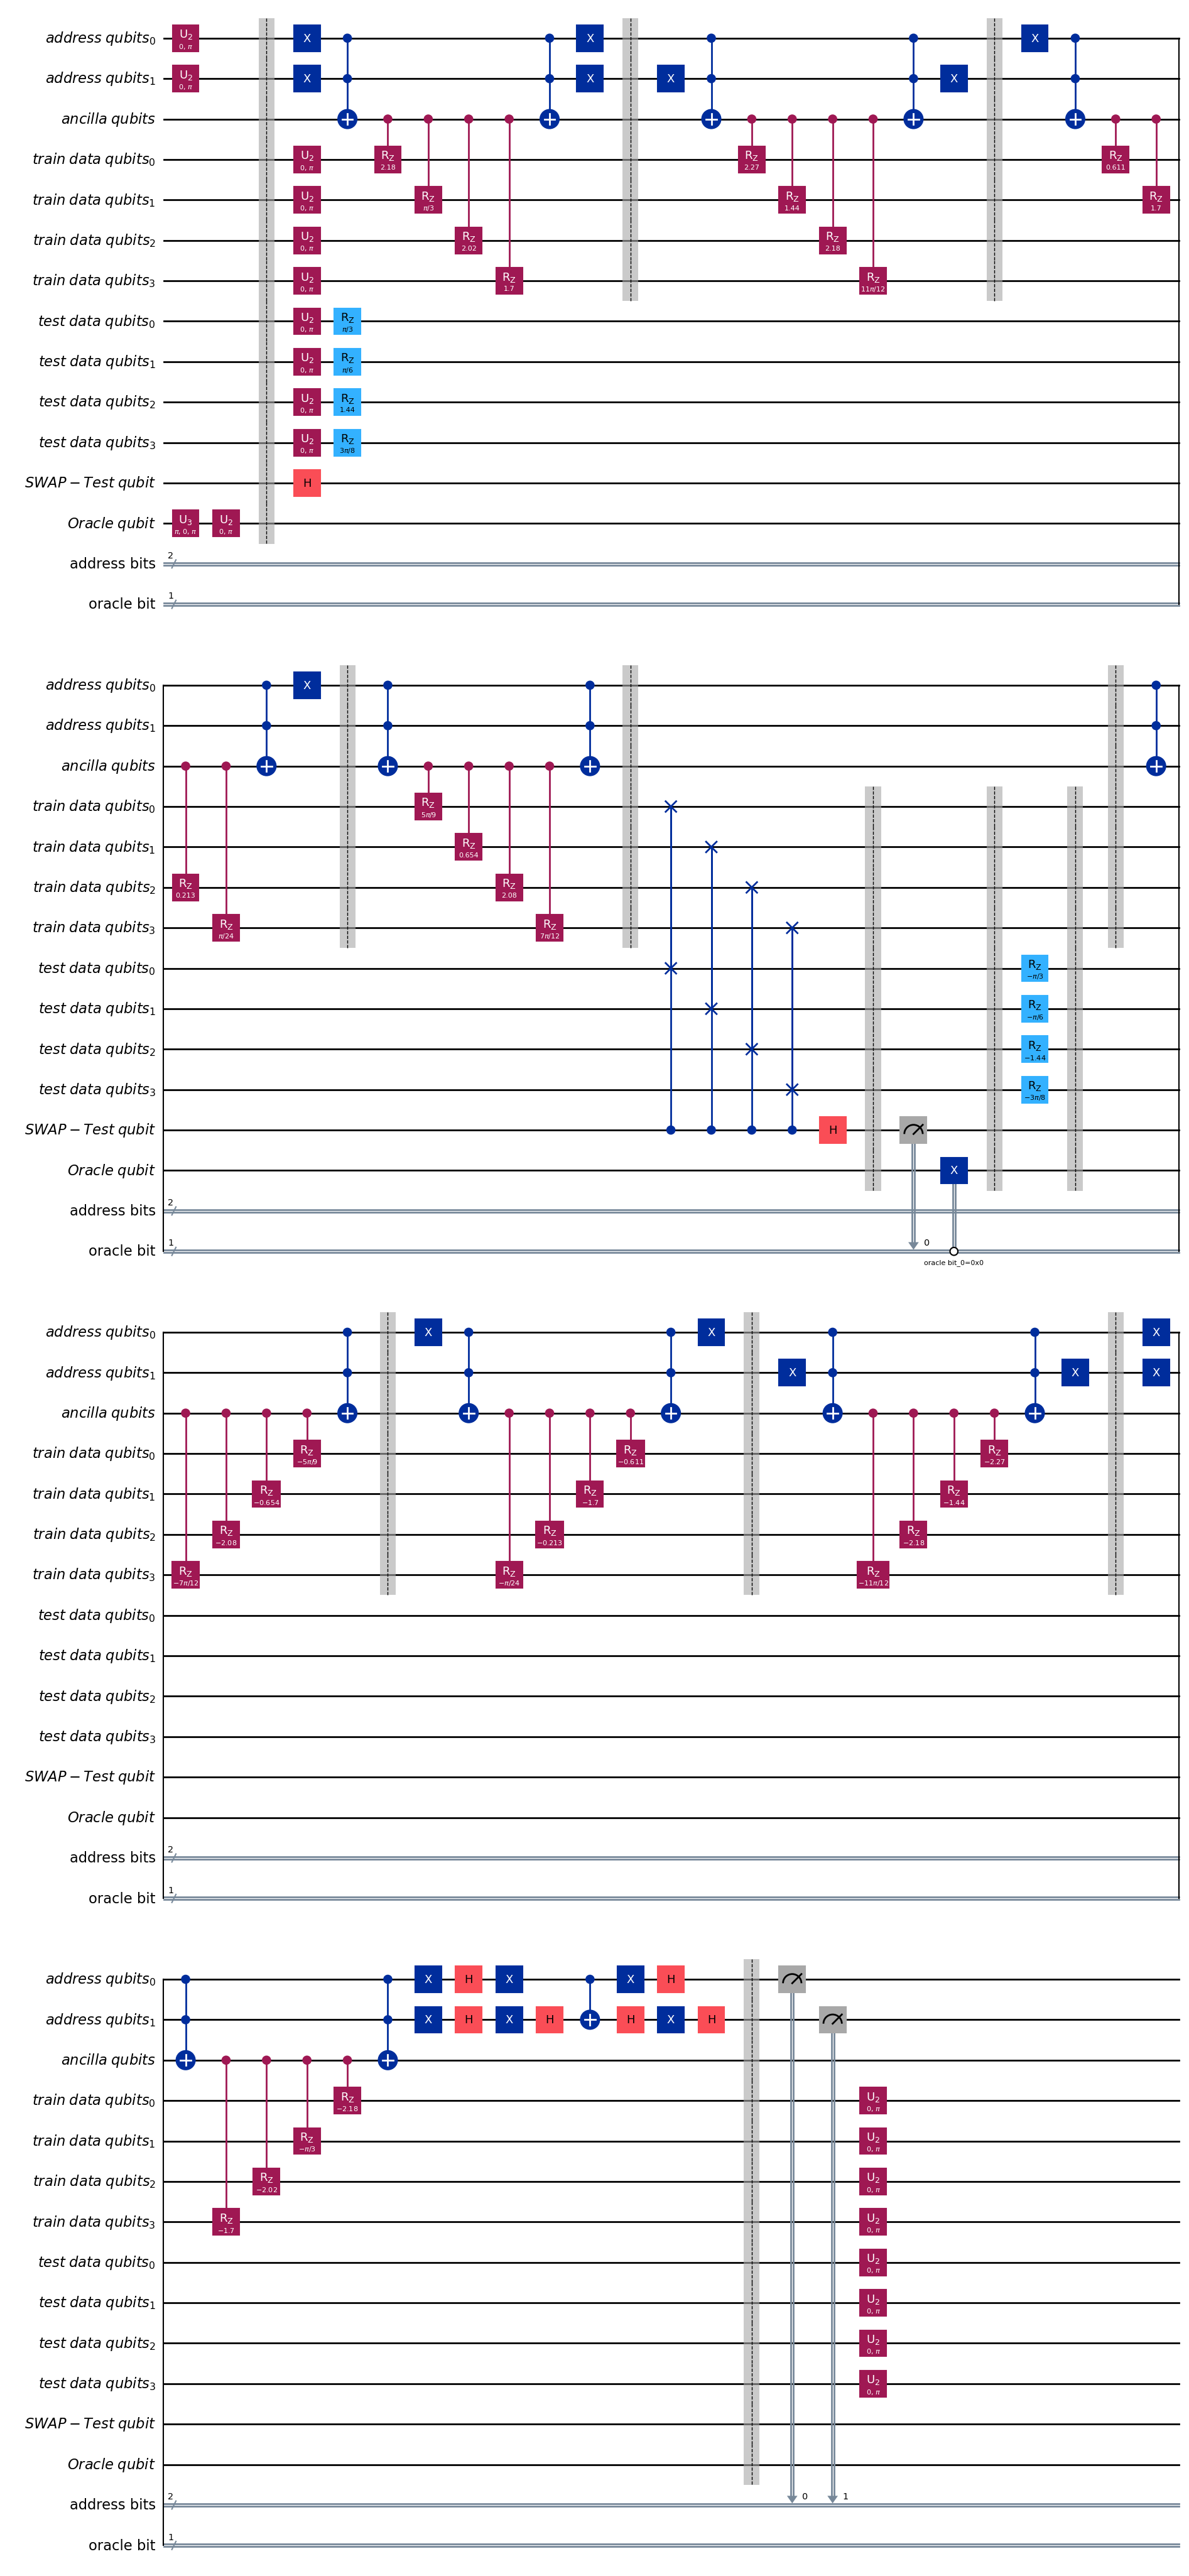

In [17]:
experiment_size = 10
min_QRAM = 3
max_QRAM = 7
qknn_e = qknn_experiments(
    x_test=x_test*np.pi,
    x_train=x_train*np.pi,
    y_test=y_test,
    y_train=y_train,
    features=4,
    min_QRAM=min_QRAM,
    max_QRAM=max_QRAM,
    max_trials=1,
    rotation="rz",
    experiment_size=experiment_size)

print(qknn_e.experiments_knn(k=1))
qknn_e.print_results()
qknn_e.draw_qknn(0).decompose().draw("mpl")